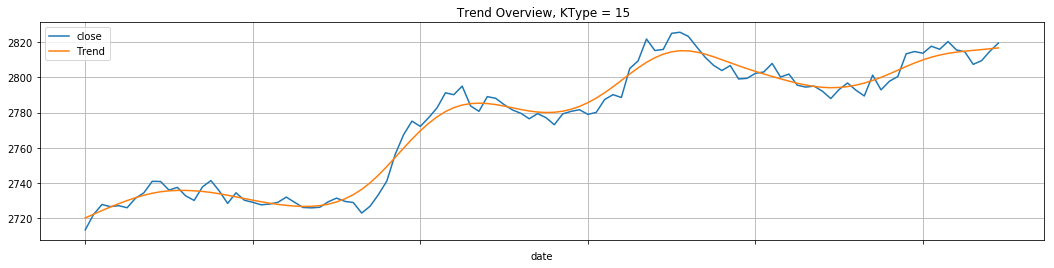

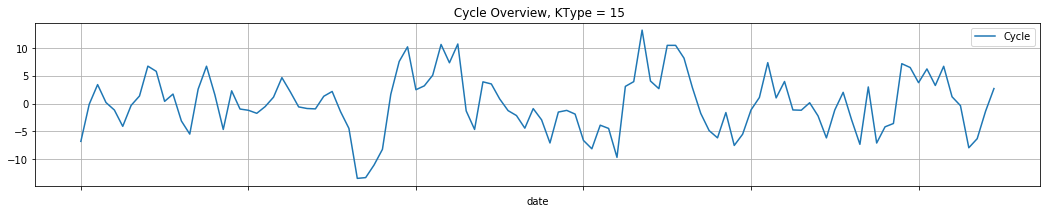

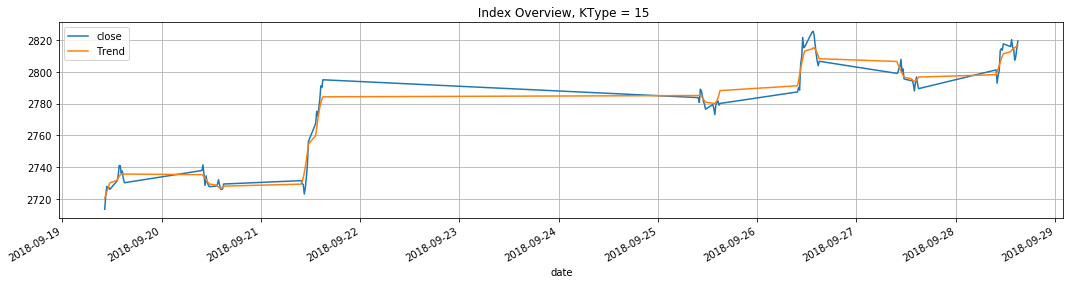

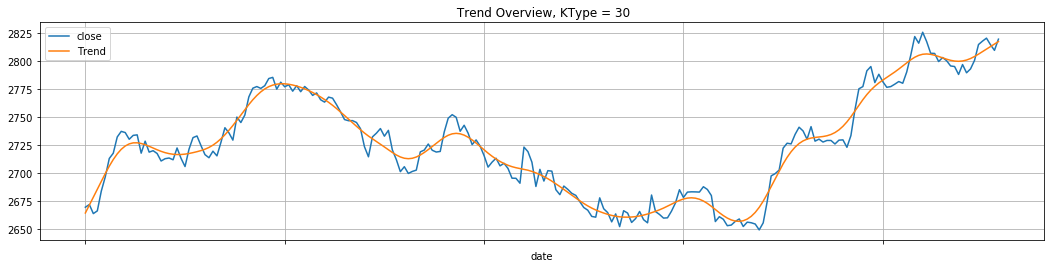

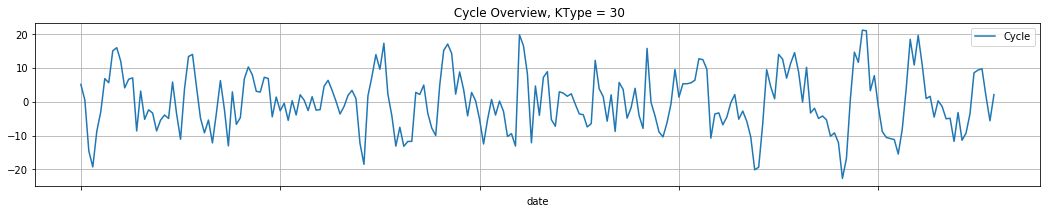

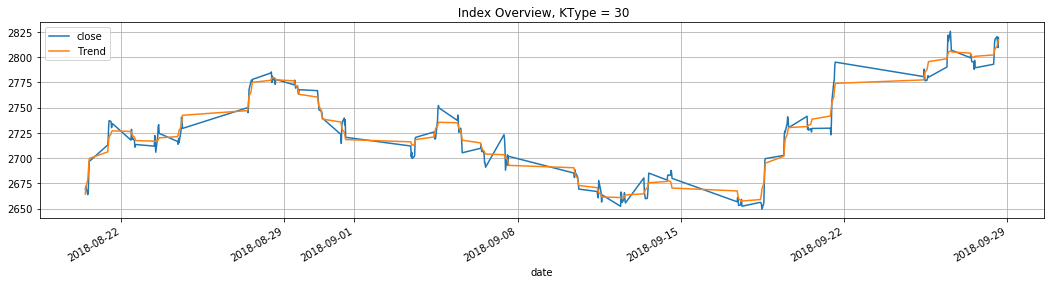

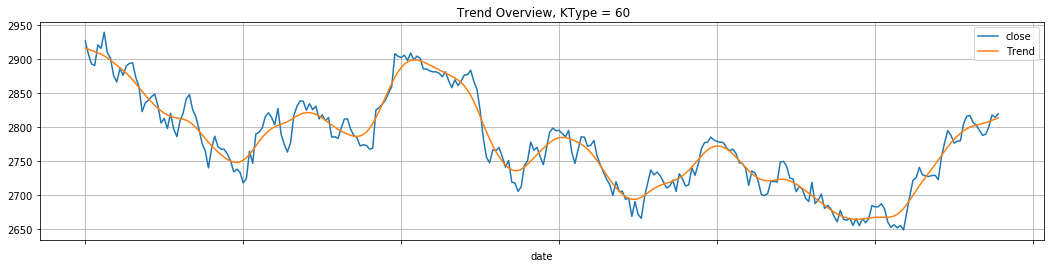

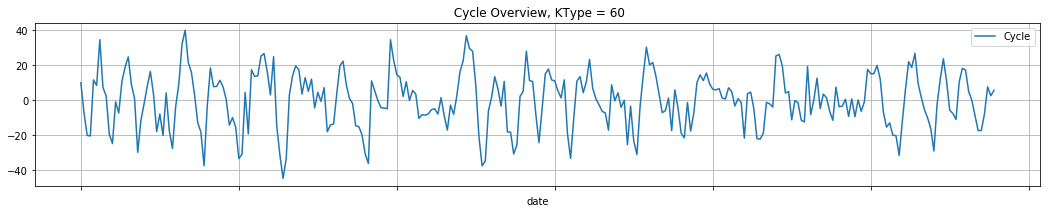

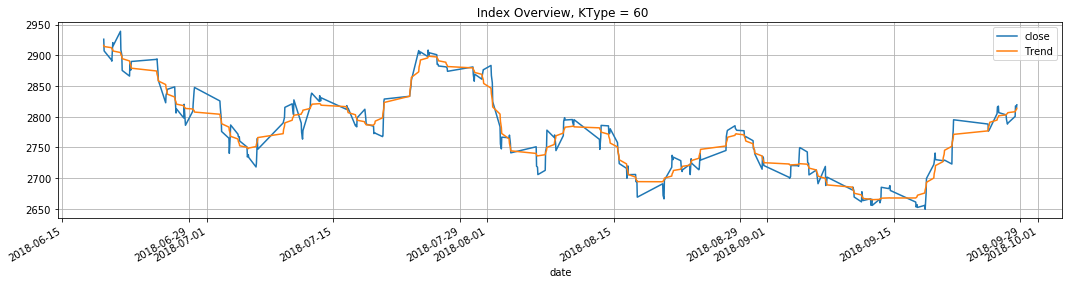

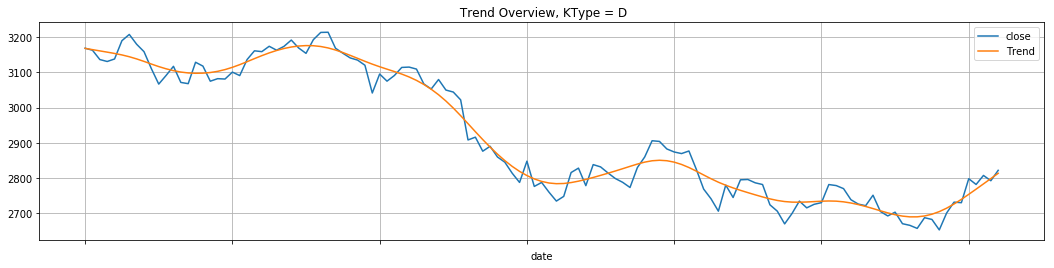

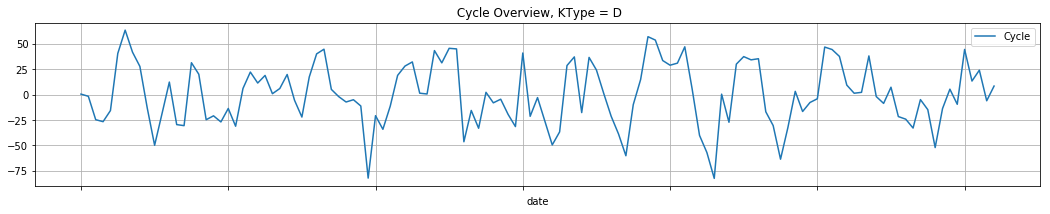

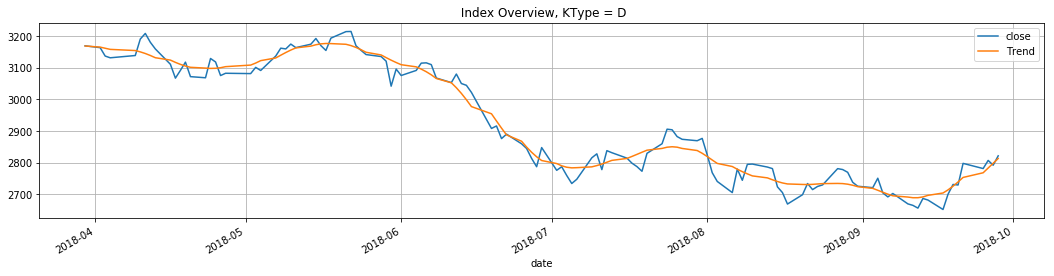

In [47]:
#from nsepy.archives import get_price_history
from datetime import date
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tushare as  ts
main_index = 'sh'
ktype_set = ['15', '30', '60', 'D']
for k in ktype_set:
    data = ts.get_hist_data(code = main_index, start = '2018-03-30', end = '2018-09-30', ktype = k)
    #data = pd.read_csv(r'd:\\data\\' + main_index + ' Historical Data.csv', thousands=',')
    #data['Date'] = pd.to_datetime(data['Date'])
    #data = data.set_index(data['Date'])
    data = data.sort_index(ascending=True)
    #data.index=pd.to_datetime(data.index,format='%Y-%m-%d')
    dta = sm.datasets.macrodata.load()
    data['Cycle'],  data['Trend'] = sm.tsa.filters.hpfilter(data['close'], 160)
    data[['close', 'Trend']].plot(grid=True, figsize=(18, 4), title=' Trend Overview, KType = '+k)    
    data[['Cycle']].plot(grid=True, figsize=(18, 3), title=' Cycle Overview, KType = '+k)
    data.index=pd.to_datetime(data.index,format='%Y-%m-%d')
    data[['close', 'Trend']].plot(grid=True, figsize=(18, 4), title=' Index Overview, KType = '+k)    